In [1]:

import numpy as np 
import pandas as pd 
import re
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.losses import BinaryCrossentropy
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import L2
import xgboost as xgb
from sklearn.metrics import accuracy_score

ModuleNotFoundError: No module named 'tensorflow'

**Distributed Denial of Service:** it's a cybersecurity menace which disrupts online services by sending an overwhelming amount of network traffic. These attacks are manually started with botnets that flood the target network. These attacks could have either of the following characteristics:
* The botnet sends a massive number of requests to the hosting servers.
* The botnet sends a high volume of random data packets, thus incapacitating the network.

These descriptions provide details about various attributes present in the dataset:
* **ip.src:** Source IP address
* **tcp.srcport:** Source port number for TCP (Transmission Control Protocol).
* **tcp.dstport:** Destination port number for TCP.
* **ip.proto:** IP protocol used (e.g., TCP, UDP).
* **frame.len:** Length of the network frame.
* **tcp.flags.syn:** TCP SYN flag.
* **tcp.flags.reset:** TCP RST flag.
* **tcp.flags.push:** TCP PUSH flag.
* **tcp.flags.ack:** TCP ACK flag.
* **ip.flags.mf:** IP More Fragments flag.
* **ip.flags.df:** IP Do Not Fragment flag.
* **ip.flags.rb:** Reserved bits in the IP header.
* **tcp.seq:** TCP sequence number.
* **tcp.ack:** TCP acknowledgment number.
* **frame.time:** Timestamp of the network frame.
* **Packets:** Number of packets in the network frame.
* **Bytes:** Number of bytes in the network frame.
* **Tx Packets:** Number of transmitted packets.
* **Tx Bytes:** Number of transmitted bytes.
* **Rx Packets:** Number of received packets.
* **Rx Bytes:** Number of received bytes.
* **Label:** The label or category assigned to the network event (e.g., 'DDoS-PSH-ACK', 'Benign', 'DDoS-ACK').

# Data Exploration & Cleaning:

In [3]:
ddos_data=pd.read_csv("ciciot2023.csv")
ddos_data

FileNotFoundError: [Errno 2] No such file or directory: 'ciciot2023.parquet'

In [3]:
ddos_data = ddos_data.sample(100000)

In [4]:
ddos_data.reset_index(drop=True , inplace= True)

In [5]:
ddos_data.columns

Index(['ip.src', 'ip.dst', 'tcp.srcport', 'tcp.dstport', 'ip.proto',
       'frame.len', 'tcp.flags.syn', 'tcp.flags.reset', 'tcp.flags.push',
       'tcp.flags.ack', 'ip.flags.mf', 'ip.flags.df', 'ip.flags.rb', 'tcp.seq',
       'tcp.ack', 'frame.time', 'Packets', 'Bytes', 'Tx Packets', 'Tx Bytes',
       'Rx Packets', 'Rx Bytes', 'Label'],
      dtype='object')

In [6]:
ddos_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 23 columns):
 #   Column           Non-Null Count   Dtype 
---  ------           --------------   ----- 
 0   ip.src           100000 non-null  object
 1   ip.dst           100000 non-null  object
 2   tcp.srcport      100000 non-null  int64 
 3   tcp.dstport      100000 non-null  int64 
 4   ip.proto         100000 non-null  int64 
 5   frame.len        100000 non-null  int64 
 6   tcp.flags.syn    100000 non-null  int64 
 7   tcp.flags.reset  100000 non-null  int64 
 8   tcp.flags.push   100000 non-null  int64 
 9   tcp.flags.ack    100000 non-null  int64 
 10  ip.flags.mf      100000 non-null  int64 
 11  ip.flags.df      100000 non-null  int64 
 12  ip.flags.rb      100000 non-null  int64 
 13  tcp.seq          100000 non-null  int64 
 14  tcp.ack          100000 non-null  int64 
 15  frame.time       100000 non-null  object
 16  Packets          100000 non-null  int64 
 17  Bytes      

In [7]:
ddos_data.describe()

,tcp.srcport,tcp.dstport,ip.proto,frame.len,tcp.flags.syn,tcp.flags.reset,tcp.flags.push,tcp.flags.ack,ip.flags.mf,ip.flags.df,ip.flags.rb,tcp.seq,tcp.ack,Packets,Bytes,Tx Packets,Tx Bytes,Rx Packets,Rx Bytes
count,100000.000000,100000.0,100000.0,100000.000000,100000.0,100000.0,100000.000000,100000.0,100000.0,100000.000000,100000.0,100000.0,100000.0,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.00000
mean,27386.112220,8000.0,6.0,98.998030,0.0,0.0,0.499790,1.0,0.0,0.499820,0.0,1.0,1.0,9.07832,799.092960,5.046570,390.522880,4.031750,408.57008
std,19642.333433,0.0,0.0,71.212252,0.0,0.0,0.500002,0.0,0.0,0.500002,0.0,0.0,0.0,2.13643,374.070657,1.356871,177.359073,0.966287,197.28494
min,1302.000000,8000.0,6.0,54.000000,0.0,0.0,0.000000,1.0,0.0,0.000000,0.0,1.0,1.0,1.00000,54.000000,1.000000,54.000000,0.000000,0.00000
25%,8637.000000,8000.0,6.0,54.000000,0.0,0.0,0.000000,1.0,0.0,0.000000,0.0,1.0,1.0,8.00000,432.000000,4.000000,216.000000,4.000000,216.00000
50%,19659.500000,8000.0,6.0,54.000000,0.0,0.0,0.000000,1.0,0.0,0.000000,0.0,1.0,1.0,10.00000,972.000000,6.000000,486.000000,4.000000,486.00000
75%,45604.000000,8000.0,6.0,66.000000,0.0,0.0,1.000000,1.0,0.0,1.000000,0.0,1.0,1.0,10.00000,1146.000000,6.000000,560.000000,4.000000,586.00000
max,60998.000000,8000.0,6.0,223.000000,0.0,0.0,1.000000,1.0,0.0,1.000000,0.0,1.0,1.0,20.00000,1229.000000,10.000000,561.000000,10.000000,668.00000


In [8]:
label_counts=ddos_data['Label'].value_counts()
label_counts

Label
Benign          49982
DDoS-ACK        25023
DDoS-PSH-ACK    24995
Name: count, dtype: int64

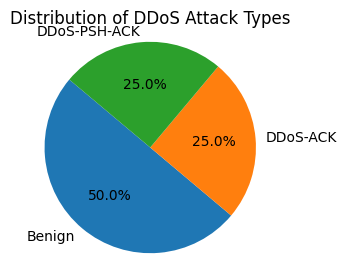

In [9]:
label_counts=ddos_data['Label'].value_counts()
plt.figure(figsize=(3, 3))
plt.pie(label_counts, labels=label_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of DDoS Attack Types')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

**Benign:** This label indicates that the network event or traffic is considered normal and does not pose any threat. In other words, it represents benign or legitimate network activity.

**DDoS-PSH-ACK:** This label represents a specific type of DDoS attack characterized by the TCP flags PSH (Push) and ACK (Acknowledgment). In this type of attack, the attacker sends a high volume of TCP packets with the PSH and ACK flags set, overwhelming the target server or network with a large number of connection requests.

**DDoS-ACK:** This label indicates another type of DDoS attack where the attacker floods the target server or network with a massive number of TCP packets with only the ACK (Acknowledgment) flag set. This flood of ACK packets consumes resources on the target system, leading to service disruption or denial of service for legitimate users.

The **PSH flag** indicates that the data should be pushed immediately to the application layer, which can cause the receiving system to process data more rapidly, potentially overwhelming its resources.

In [10]:
ddos_data['ip.dst'].value_counts()

ip.dst
192.168.23.2    100000
Name: count, dtype: int64

Since, we're only working on one ip.dst we can drop this column.

In [11]:
ddos_data.drop('ip.dst',axis=1,inplace=True)

In [12]:
ddos_data

,ip.src,tcp.srcport,tcp.dstport,ip.proto,frame.len,tcp.flags.syn,tcp.flags.reset,tcp.flags.push,tcp.flags.ack,ip.flags.mf,...,tcp.seq,tcp.ack,frame.time,Packets,Bytes,Tx Packets,Tx Bytes,Rx Packets,Rx Bytes,Label
0,192.168.4.1,2945,8000,6,54,0,0,0,1,0,...,1,1,16-Jun 2020 21:59:28.843891000 Mountain Dayli...,8,432,4,216,4,216,DDoS-ACK
1,192.168.10.1,42276,8000,6,66,0,0,0,1,0,...,1,1,16-Jun 2020 22:08:20.919148000 Mountain Dayli...,10,1151,6,560,4,591,Benign
2,192.168.20.1,4517,8000,6,54,0,0,1,1,0,...,1,1,16-Jun 2020 20:26:54.471308000 Mountain Dayli...,8,432,4,216,4,216,DDoS-PSH-ACK
3,192.168.13.1,44652,8000,6,222,0,0,1,1,0,...,1,1,16-Jun 2020 20:24:49.885520000 Mountain Dayli...,10,1146,6,560,4,586,Benign
4,192.168.7.1,11815,8000,6,54,0,0,0,1,0,...,1,1,16-Jun 2020 22:01:09.235094000 Mountain Dayli...,8,432,4,216,4,216,DDoS-ACK
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,192.168.4.1,6873,8000,6,54,0,0,0,1,0,...,1,1,16-Jun 2020 21:59:28.883088000 Mountain Dayli...,8,432,4,216,4,216,DDoS-ACK
99996,192.168.2.1,52504,8000,6,66,0,0,0,1,0,...,1,1,16-Jun 2020 21:59:18.882294000 Mountain Dayli...,10,1134,6,560,4,574,Benign
99997,192.168.16.1,40968,8000,6,222,0,0,1,1,0,...,1,1,16-Jun 2020 20:23:54.693378000 Mountain Dayli...,10,1146,6,560,4,586,Benign
99998,192.168.13.1,59880,8000,6,66,0,0,0,1,0,...,1,1,16-Jun 2020 22:06:46.939273000 Mountain Dayli...,10,1229,6,561,4,668,Benign


It looks like we're analysing ddos attacks performed on only one ip address destination.

In [13]:
ddos_data['ip.src'].value_counts()

ip.src
192.168.19.1    7209
192.168.11.1    7172
192.168.7.1     7169
192.168.4.1     7167
192.168.1.1     7146
192.168.2.1     7139
192.168.16.1    7137
192.168.5.1     7133
192.168.20.1    7132
192.168.13.1    7127
192.168.10.1    7123
192.168.17.1    7123
192.168.8.1     7114
192.168.14.1    7109
Name: count, dtype: int64

These IP addresses represent the botnets utilized for the DDoS attacks. The consistent count of occurrences (10800) for each IP address implies an even distribution of DDoS attack traffic across various botnets.

In [14]:
ddos_data['tcp.srcport'].value_counts()

tcp.srcport
6460     10
2790     10
5047     10
8414     10
2828     10
         ..
7208      1
13908     1
55404     1
16499     1
1664      1
Name: count, Length: 29758, dtype: int64

In [15]:
constant_features = ddos_data.columns[ddos_data.nunique() == 1]
constant_features

Index(['tcp.dstport', 'ip.proto', 'tcp.flags.syn', 'tcp.flags.reset',
       'tcp.flags.ack', 'ip.flags.mf', 'ip.flags.rb', 'tcp.seq', 'tcp.ack'],
      dtype='object')

In [16]:
print(f'tcp.dstport:{ddos_data["tcp.dstport"].value_counts()}')
print(f'ip.proto:{ddos_data["ip.proto"].value_counts()}')
print(f'tcp.flags.syn:{ddos_data["tcp.flags.syn"].value_counts()}')
print(f'tcp.flags.reset:{ddos_data["tcp.flags.reset"].value_counts()}')
print(f'tcp.flags.ack:{ddos_data["tcp.flags.ack"].value_counts()}')
print(f'ip.flags.mf:{ddos_data["ip.flags.mf"].value_counts()}')
print(f'ip.flags.rb:{ddos_data["ip.flags.rb"].value_counts()}')
print(f'tcp.seq:{ddos_data["tcp.seq"].value_counts()}')
print(f'tcp.ack:{ddos_data["tcp.ack"].value_counts()}')

tcp.dstport:tcp.dstport
8000    100000
Name: count, dtype: int64
ip.proto:ip.proto
6    100000
Name: count, dtype: int64
tcp.flags.syn:tcp.flags.syn
0    100000
Name: count, dtype: int64
tcp.flags.reset:tcp.flags.reset
0    100000
Name: count, dtype: int64
tcp.flags.ack:tcp.flags.ack
1    100000
Name: count, dtype: int64
ip.flags.mf:ip.flags.mf
0    100000
Name: count, dtype: int64
ip.flags.rb:ip.flags.rb
0    100000
Name: count, dtype: int64
tcp.seq:tcp.seq
1    100000
Name: count, dtype: int64
tcp.ack:tcp.ack
1    100000
Name: count, dtype: int64


It's better to drop constant features:

In [17]:
ddos_data.drop(columns=constant_features,inplace=True)

In [18]:
ddos_data.columns

Index(['ip.src', 'tcp.srcport', 'frame.len', 'tcp.flags.push', 'ip.flags.df',
       'frame.time', 'Packets', 'Bytes', 'Tx Packets', 'Tx Bytes',
       'Rx Packets', 'Rx Bytes', 'Label'],
      dtype='object')

In [19]:
ddos_data['frame.time'].value_counts()

frame.time
16-Jun 2020 21:59:28.843891000 Mountain Daylight Time    1
16-Jun 2020 20:20:45.087286000 Mountain Daylight Time    1
16-Jun 2020 20:24:11.758832000 Mountain Daylight Time    1
16-Jun 2020 22:03:04.974772000 Mountain Daylight Time    1
16-Jun 2020 20:18:28.124390000 Mountain Daylight Time    1
                                                        ..
16-Jun 2020 20:20:37.455086000 Mountain Daylight Time    1
16-Jun 2020 22:04:55.397176000 Mountain Daylight Time    1
16-Jun 2020 20:24:35.002104000 Mountain Daylight Time    1
16-Jun 2020 22:01:09.223391000 Mountain Daylight Time    1
16-Jun 2020 20:26:54.455468000 Mountain Daylight Time    1
Name: count, Length: 100000, dtype: int64

## Normalize `frame.time` column:

In [20]:
ddos_data['frame.time']

0         16-Jun 2020 21:59:28.843891000 Mountain Dayli...
1         16-Jun 2020 22:08:20.919148000 Mountain Dayli...
2         16-Jun 2020 20:26:54.471308000 Mountain Dayli...
3         16-Jun 2020 20:24:49.885520000 Mountain Dayli...
4         16-Jun 2020 22:01:09.235094000 Mountain Dayli...
                               ...                        
99995     16-Jun 2020 21:59:28.883088000 Mountain Dayli...
99996     16-Jun 2020 21:59:18.882294000 Mountain Dayli...
99997     16-Jun 2020 20:23:54.693378000 Mountain Dayli...
99998     16-Jun 2020 22:06:46.939273000 Mountain Dayli...
99999     16-Jun 2020 20:26:54.455468000 Mountain Dayli...
Name: frame.time, Length: 100000, dtype: object

In [21]:
def normalize_time_column():
    ddos_data['frame.time'] = ddos_data['frame.time'].str.replace(' Mountain Daylight Time', '')
    ddos_data['frame.time']=ddos_data['frame.time'].apply(lambda x: re.sub(r'\..*', '',x ))
    ddos_data['frame.time'] = pd.to_datetime(ddos_data['frame.time'], format=' %d-%b %Y %H:%M:%S')
    ddos_data['frame.time'] = ddos_data['frame.time'].dt.tz_localize('UTC').dt.tz_convert('US/Mountain')

In [22]:
normalize_time_column()

In [23]:
connection_by_time=ddos_data[ddos_data['Label']!='Benign'].groupby(['frame.time']).size()
connection_by_time

frame.time
2020-06-16 14:18:15-06:00    3577
2020-06-16 14:19:44-06:00    3588
2020-06-16 14:21:14-06:00    3589
2020-06-16 14:22:39-06:00    1255
2020-06-16 14:22:40-06:00    2342
2020-06-16 14:24:02-06:00    3571
2020-06-16 14:25:27-06:00    3539
2020-06-16 14:26:54-06:00    3534
2020-06-16 15:57:57-06:00    3226
2020-06-16 15:57:58-06:00     343
2020-06-16 15:59:28-06:00    3579
2020-06-16 16:01:09-06:00    3580
2020-06-16 16:03:04-06:00    2355
2020-06-16 16:03:05-06:00    1171
2020-06-16 16:05:19-06:00    3538
2020-06-16 16:07:04-06:00    3633
2020-06-16 16:08:59-06:00    3598
dtype: int64

In [24]:
ddos_data.dtypes

ip.src                                 object
tcp.srcport                             int64
frame.len                               int64
tcp.flags.push                          int64
ip.flags.df                             int64
frame.time        datetime64[ns, US/Mountain]
Packets                                 int64
Bytes                                   int64
Tx Packets                              int64
Tx Bytes                                int64
Rx Packets                              int64
Rx Bytes                                int64
Label                                  object
dtype: object

In [25]:
connection_by_time_b=ddos_data[ddos_data['Label']=='Benign'].groupby(['frame.time']).size()
connection_by_time_b

frame.time
2020-06-16 14:18:22-06:00    38
2020-06-16 14:18:23-06:00    51
2020-06-16 14:18:24-06:00    49
2020-06-16 14:18:25-06:00    45
2020-06-16 14:18:26-06:00    42
                             ..
2020-06-16 16:10:42-06:00    29
2020-06-16 16:10:43-06:00    36
2020-06-16 16:10:44-06:00    42
2020-06-16 16:10:45-06:00    14
2020-06-16 16:10:46-06:00    40
Length: 1185, dtype: int64

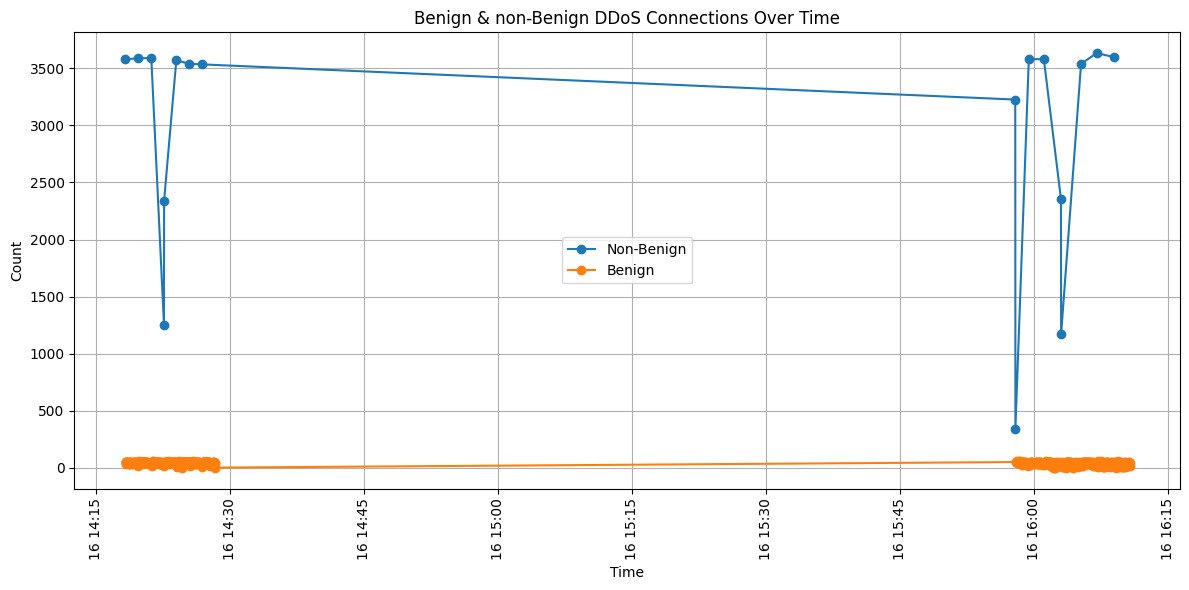

In [26]:
plt.figure(figsize=(12, 6))
plt.plot(connection_by_time.index, connection_by_time.values, marker='o', linestyle='-',label='Non-Benign')
plt.plot(connection_by_time_b.index, connection_by_time_b.values, marker='o', linestyle='-', label='Benign')
plt.title('Benign & non-Benign DDoS Connections Over Time')
plt.xlabel('Time')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.grid(True)k
plt.tight_layout()
plt.legend()
plt.show()


In [27]:
connection_by_time_different_ip_src=ddos_data[ddos_data['Label']!='Benign'].groupby(['ip.src','frame.time']).size()
connection_by_time_different_ip_src

ip.src        frame.time               
192.168.1.1   2020-06-16 14:18:15-06:00    3577
              2020-06-16 15:57:57-06:00    3226
              2020-06-16 15:57:58-06:00     343
192.168.11.1  2020-06-16 14:25:27-06:00    3539
              2020-06-16 16:07:04-06:00    3633
192.168.14.1  2020-06-16 14:24:02-06:00    3571
              2020-06-16 16:05:19-06:00    3538
192.168.17.1  2020-06-16 14:22:39-06:00    1255
              2020-06-16 14:22:40-06:00    2342
              2020-06-16 16:03:04-06:00    2355
              2020-06-16 16:03:05-06:00    1171
192.168.20.1  2020-06-16 14:26:54-06:00    3534
              2020-06-16 16:08:59-06:00    3598
192.168.4.1   2020-06-16 14:19:44-06:00    3588
              2020-06-16 15:59:28-06:00    3579
192.168.7.1   2020-06-16 14:21:14-06:00    3589
              2020-06-16 16:01:09-06:00    3580
dtype: int64

<Figure size 1000x600 with 0 Axes>

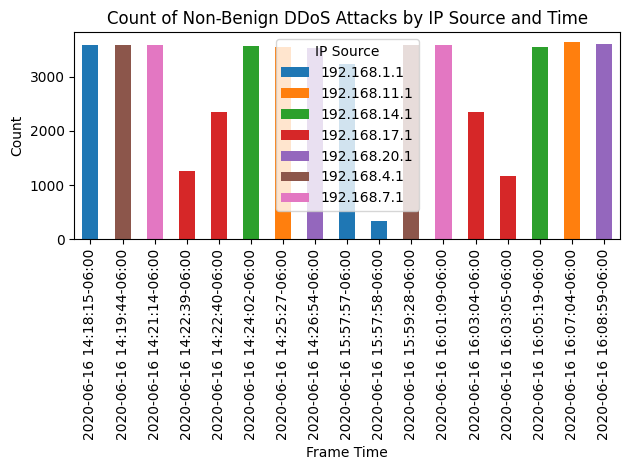

In [28]:
plt.figure(figsize=(10, 6))
connection_by_time_different_ip_src.unstack(level=0).plot(kind='bar', stacked=True)
plt.title('Count of Non-Benign DDoS Attacks by IP Source and Time')
plt.xlabel('Frame Time')
plt.ylabel('Count')
plt.legend(title='IP Source')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [29]:
ddos_data[ddos_data['Label']=='Benign'].groupby(['frame.time','Packets']).size()

frame.time                 Packets
2020-06-16 14:18:22-06:00  10         38
2020-06-16 14:18:23-06:00  10         51
2020-06-16 14:18:24-06:00  10         49
2020-06-16 14:18:25-06:00  10         45
2020-06-16 14:18:26-06:00  10         42
                                      ..
2020-06-16 16:10:42-06:00  10         29
2020-06-16 16:10:43-06:00  10         36
2020-06-16 16:10:44-06:00  10         42
2020-06-16 16:10:45-06:00  10         14
2020-06-16 16:10:46-06:00  10         40
Length: 1185, dtype: int64

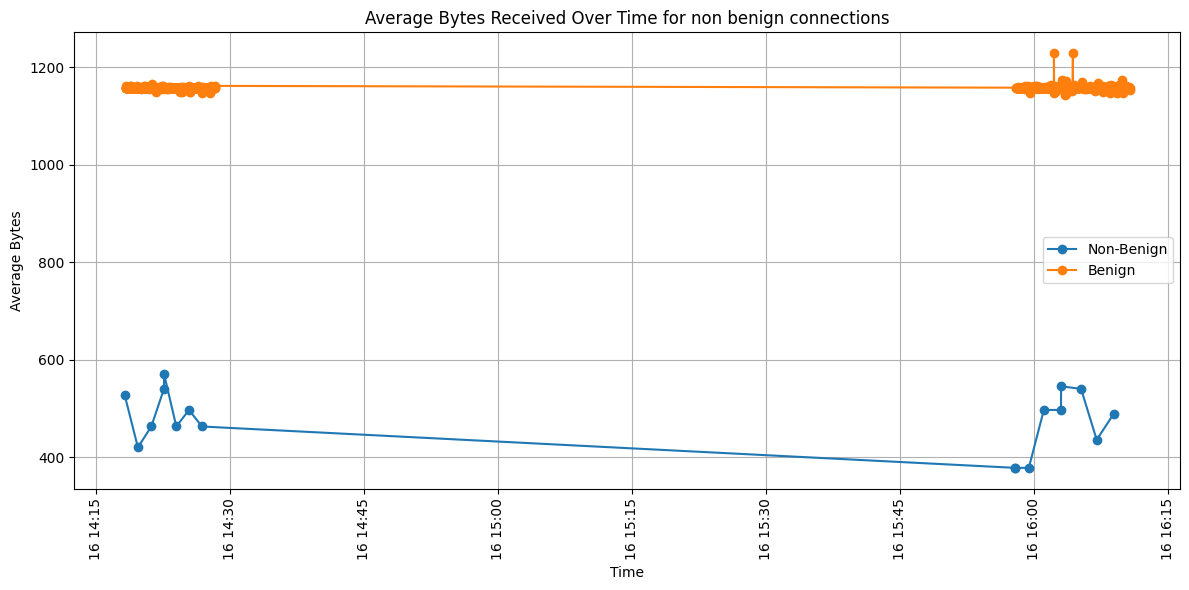

In [30]:
non_benign_data = ddos_data[ddos_data['Label'] != 'Benign']
non_benign_bytes_by_time = non_benign_data.groupby(['frame.time', 'Bytes']).size().reset_index(name='count')
non_benign_bytes_by_time = non_benign_bytes_by_time.groupby('frame.time')['Bytes'].mean()

benign_data = ddos_data[ddos_data['Label'] == 'Benign']

benign_bytes_by_time =benign_data.groupby(['frame.time', 'Bytes']).size().reset_index(name='count')
benign_bytes_by_time = benign_bytes_by_time.groupby('frame.time')['Bytes'].mean()

plt.figure(figsize=(12, 6))
plt.plot(non_benign_bytes_by_time.index, non_benign_bytes_by_time.values, label='Non-Benign', linestyle='-', marker='o')
plt.plot(benign_bytes_by_time.index, benign_bytes_by_time.values, label='Benign', linestyle='-', marker='o')
plt.title('Average Bytes Received Over Time for non benign connections')
plt.xlabel('Time')
plt.ylabel('Average Bytes')
plt.xticks(rotation=90)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

The average of bytes sent by timestamp varies for non-benign connections. But it's quite constant for benign connections.

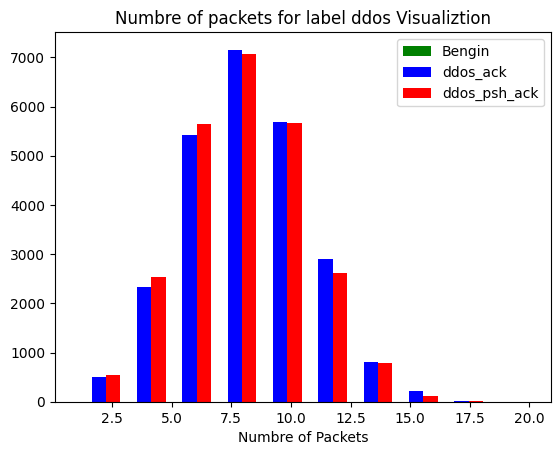

In [31]:
benign=ddos_data[ddos_data['Label']=="Bengin"].Packets
ddos_ack=ddos_data[ddos_data['Label']=="DDoS-ACK"].Packets
ddos_psh_ack=ddos_data[ddos_data['Label']=="DDoS-PSH-ACK"].Packets
plt.xlabel("Numbre of Packets")
plt.ylabel("")
plt.title("Numbre of packets for label ddos Visualiztion")
plt.hist([benign, ddos_ack,ddos_psh_ack], rwidth=0.95, color=['green','blue','red'],label=['Bengin','ddos_ack','ddos_psh_ack'])
plt.legend()

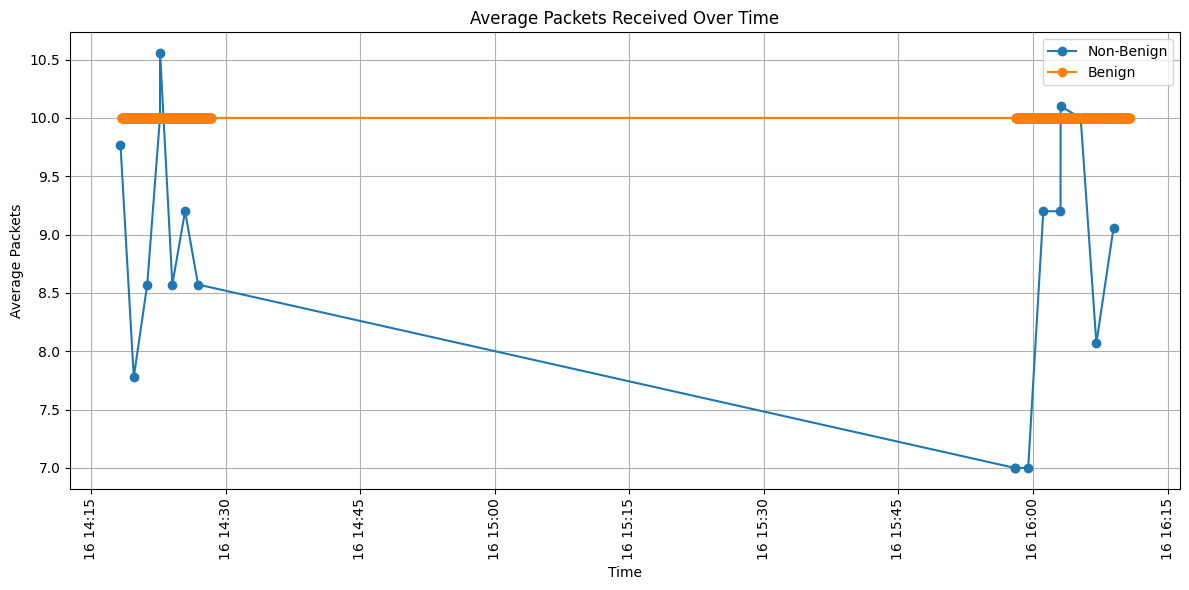

In [32]:
# Filter non-benign and benign data
non_benign_data = ddos_data[ddos_data['Label'] != 'Benign']
benign_data = ddos_data[ddos_data['Label'] == 'Benign']

# Group by 'frame.time' and 'Packets' and calculate the mean for non-benign traffic
non_benign_packets_by_time = non_benign_data.groupby(['frame.time', 'Packets']).size().reset_index(name='count')
non_benign_packets_by_time = non_benign_packets_by_time.groupby('frame.time')['Packets'].mean()

# Group by 'frame.time' and 'Packets' and calculate the mean for benign traffic
benign_packets_by_time = benign_data.groupby(['frame.time', 'Packets']).size().reset_index(name='count')
benign_packets_by_time = benign_packets_by_time.groupby('frame.time')['Packets'].mean()

# Plotting the line chart for non-benign and benign traffic
plt.figure(figsize=(12, 6))
plt.plot(non_benign_packets_by_time.index, non_benign_packets_by_time.values, label='Non-Benign', linestyle='-', marker='o')
plt.plot(benign_packets_by_time.index, benign_packets_by_time.values, label='Benign', linestyle='-', marker='o')
plt.title('Average Packets Received Over Time')
plt.xlabel('Time')
plt.ylabel('Average Packets')
plt.xticks(rotation=90)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

While the number of packets per frame for non-benign traffic varies, the number of packets per frame for benign traffic is constant = 10.

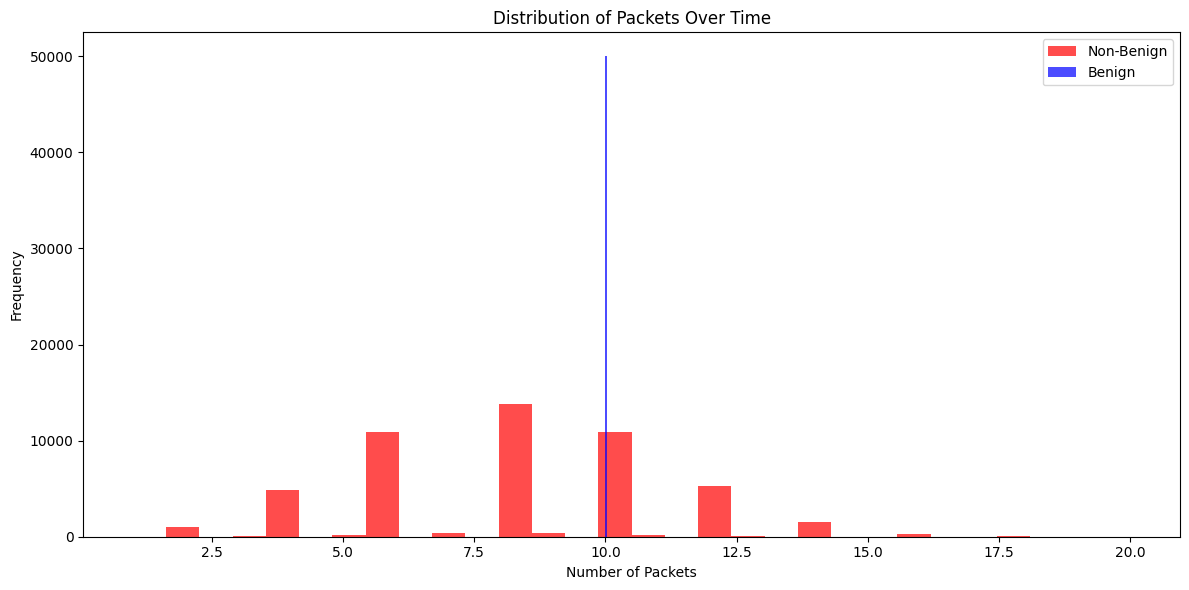

In [33]:
# Filter non-benign and benign data
non_benign_data = ddos_data[ddos_data['Label'] != 'Benign']
benign_data = ddos_data[ddos_data['Label'] == 'Benign']

# Plot histograms for non-benign and benign connections
plt.figure(figsize=(12, 6))
plt.hist(non_benign_data['Packets'], bins=30, alpha=0.7, color='red', label='Non-Benign')
plt.hist(benign_data['Packets'], bins=30, alpha=0.7, color='blue', label='Benign')
plt.title('Distribution of Packets Over Time')
plt.xlabel('Number of Packets')
plt.ylabel('Frequency')
plt.legend()
#plt.grid(True)
plt.tight_layout()
plt.show()

In [34]:
label_counts = ddos_data.groupby(['frame.time','Label']).size().unstack(fill_value=0)
label_counts

Label,Benign,DDoS-ACK,DDoS-PSH-ACK
frame.time,,,
2020-06-16 14:18:15-06:00,0,0,3577
2020-06-16 14:18:22-06:00,38,0,0
2020-06-16 14:18:23-06:00,51,0,0
2020-06-16 14:18:24-06:00,49,0,0
2020-06-16 14:18:25-06:00,45,0,0
...,...,...,...
2020-06-16 16:10:42-06:00,29,0,0
2020-06-16 16:10:43-06:00,36,0,0
2020-06-16 16:10:44-06:00,42,0,0


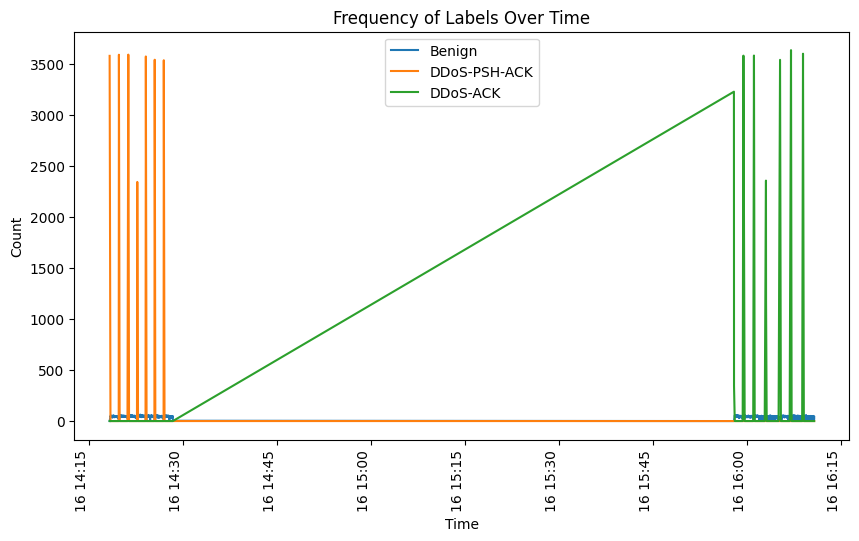

In [35]:
label_counts['Benign'].plot(kind='line', figsize=(10, 6))
label_counts['DDoS-PSH-ACK'].plot(kind='line', figsize=(10, 6))
label_counts['DDoS-ACK'].plot(kind='line', figsize=(10, 6))

plt.title('Frequency of Labels Over Time')
plt.xlabel('Time')
plt.xticks(rotation=90)
plt.ylabel('Count')
plt.legend()
plt.show()

# Correlation Analysis:

In [36]:
# ddos_data.hist(bins =10, figsize=(20, 15))
# plt.show()

In [37]:
# sns.pairplot(ddos_data,hue='Label',vars=['frame.time','Packets','Tx Packets'])

In [38]:
numerical_features = [feature for feature in ddos_data.columns if ddos_data[feature].dtypes != 'O']
numerical_features

['tcp.srcport',
 'frame.len',
 'tcp.flags.push',
 'ip.flags.df',
 'frame.time',
 'Packets',
 'Bytes',
 'Tx Packets',
 'Tx Bytes',
 'Rx Packets',
 'Rx Bytes']

In [39]:
categorical_features = [feature for feature in ddos_data.columns if ddos_data[feature].dtypes == 'O']
categorical_features

['ip.src', 'Label']

In [40]:
corr_matrix=ddos_data[numerical_features].corr()
corr_matrix

,tcp.srcport,frame.len,tcp.flags.push,ip.flags.df,frame.time,Packets,Bytes,Tx Packets,Tx Bytes,Rx Packets,Rx Bytes
tcp.srcport,1.000000,0.548969,-0.056942,0.947496,0.067698,0.404352,0.907305,0.662260,0.904253,-0.035943,0.907412
frame.len,0.548969,1.000000,0.547906,0.632117,-0.541868,0.272606,0.606176,0.444011,0.604171,-0.020763,0.606216
tcp.flags.push,-0.056942,0.547906,1.000000,0.000140,-0.997733,-0.014167,-0.004330,-0.012817,-0.005203,-0.013326,-0.003533
ip.flags.df,0.947496,0.632117,0.000140,1.000000,0.007954,0.431258,0.958989,0.702419,0.955791,-0.032846,0.959077
frame.time,0.067698,-0.541868,-0.997733,0.007954,1.000000,0.016657,0.011796,0.017744,0.012627,0.011910,0.011015
Packets,0.404352,0.272606,-0.014167,0.431258,0.016657,1.000000,0.664623,0.943771,0.676941,0.885714,0.651617
Bytes,0.907305,0.606176,-0.004330,0.958989,0.011796,0.664623,1.000000,0.871255,0.998298,0.246033,0.998624
Tx Packets,0.662260,0.444011,-0.012817,0.702419,0.017744,0.943771,0.871255,1.000000,0.880656,0.682436,0.860272
Tx Bytes,0.904253,0.604171,-0.005203,0.955791,0.012627,0.676941,0.998298,0.880656,1.000000,0.260067,0.993866
Rx Packets,-0.035943,-0.020763,-0.013326,-0.032846,0.011910,0.885714,0.246033,0.682436,0.260067,1.000000,0.232701


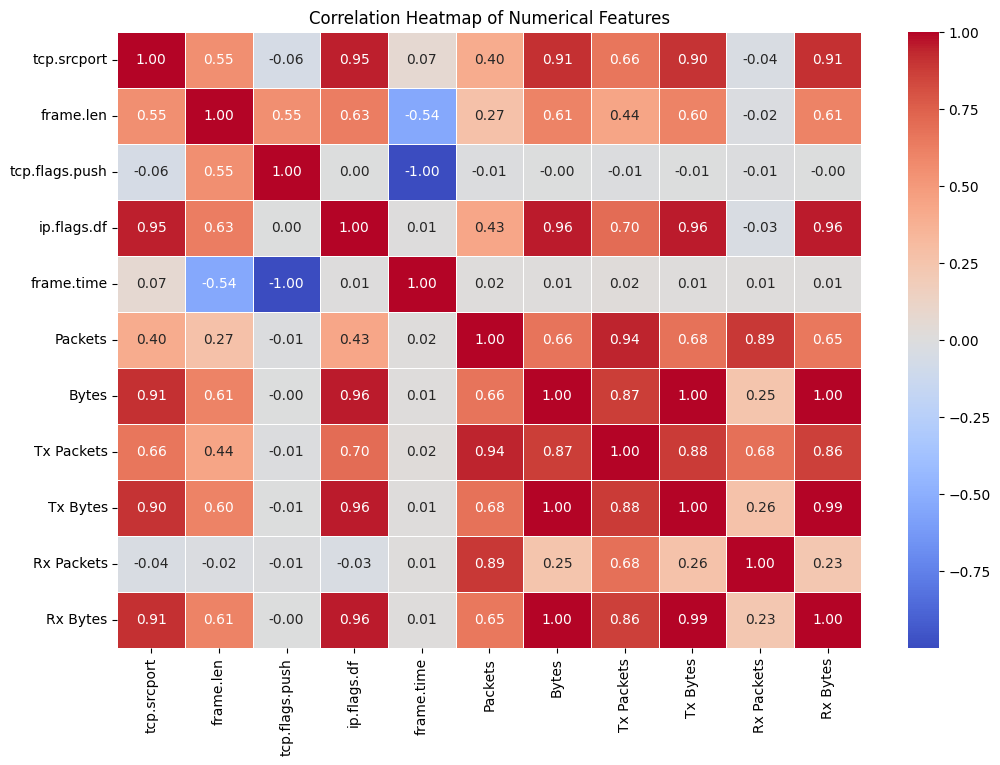

In [41]:
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Heatmap of Numerical Features')
plt.show()

In [42]:
#Let's examine binary columns
binary_features=ddos_data.columns[ddos_data.nunique() == 2]
binary_features

Index(['tcp.flags.push', 'ip.flags.df'], dtype='object')

We don't want to normalize binary features.

In [43]:
numerical_features.remove('Tx Bytes')
numerical_features.remove('Rx Bytes')
ddos_data.drop(['Tx Bytes','Rx Bytes'],axis=1, inplace=True)
numerical_features = [feature for feature in numerical_features if feature not in binary_features]

In [44]:
numerical_features 

['tcp.srcport',
 'frame.len',
 'frame.time',
 'Packets',
 'Bytes',
 'Tx Packets',
 'Rx Packets']

In [45]:
def z_score_normalization(x):
    return (x - x.mean()) / x.std()

In [46]:
ddos_data[numerical_features ] = ddos_data[numerical_features ].apply(z_score_normalization)
ddos_data[numerical_features ].isnull().sum()

tcp.srcport    0
frame.len      0
frame.time     0
Packets        0
Bytes          0
Tx Packets     0
Rx Packets     0
dtype: int64

## Labeling Catgorical data:

If we were to use sigmoid as the final activation of our neural network we have to encode the Label column using LabelEncoder.
If we're using softmax a.k.a classifying into 3 classes, we use One Hot encoder.

In [47]:
label_encoder=LabelEncoder()
def Encode_ip_src_column():
    ddos_data['ip.src']=label_encoder.fit_transform(ddos_data['ip.src'])

In [48]:
def Encode_Label_Column_1():
    label_mapping = {'Benign': 0, 'DDoS-PSH-ACK': 1, 'DDoS-ACK': 1}
    ddos_data['label_encoded']=label_encoder.fit_transform(ddos_data['Label'])
    ddos_data['label_encoded'] = ddos_data['Label'].map(label_mapping)

In [49]:
Encode_ip_src_column()
Encode_Label_Column_1()

In [50]:
ddos_data['label_encoded'].value_counts()

label_encoded
1    50018
0    49982
Name: count, dtype: int64

In [51]:
ddos_data['ip.src'].value_counts()

ip.src
7     7209
2     7172
12    7169
10    7167
0     7146
8     7139
5     7137
11    7133
9     7132
3     7127
1     7123
6     7123
13    7114
4     7109
Name: count, dtype: int64

In [52]:
def Encode_Label_Column_2():
    data1=pd.get_dummies(ddos_data,columns=['Label'],drop_first=False,dtype='int64')
    return data1

In [53]:
ddos_data=Encode_Label_Column_2()

In [54]:
ddos_data

,ip.src,tcp.srcport,frame.len,tcp.flags.push,ip.flags.df,frame.time,Packets,Bytes,Tx Packets,Rx Packets,label_encoded,Label_Benign,Label_DDoS-ACK,Label_DDoS-PSH-ACK
0,10,-1.244308,-0.631886,0,0,0.912753,-0.504730,-0.981347,-0.771311,-0.032858,1,0,1,0
1,1,0.758051,-0.463376,0,1,1.088344,0.431411,0.940750,0.702668,-0.032858,0,1,0,0
2,9,-1.164277,-0.631886,1,0,-0.920395,-0.504730,-0.981347,-0.771311,-0.032858,1,0,0,1
3,3,0.879014,1.727259,1,1,-0.961652,0.431411,0.927384,0.702668,-0.032858,0,1,0,0
4,12,-0.792732,-0.631886,0,0,0.946089,-0.504730,-0.981347,-0.771311,-0.032858,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,10,-1.044332,-0.631886,0,0,0.912753,-0.504730,-0.981347,-0.771311,-0.032858,1,0,1,0
99996,8,1.278763,-0.463376,0,1,0.909452,0.431411,0.895304,0.702668,-0.032858,0,1,0,0
99997,5,0.691460,1.727259,1,1,-0.979806,0.431411,0.927384,0.702668,-0.032858,0,1,0,0
99998,3,1.654278,-0.463376,0,1,1.057319,0.431411,1.149267,0.702668,-0.032858,0,1,0,0


# Split train, test data:

In [55]:
y=ddos_data['label_encoded']
X=ddos_data.drop(columns=['label_encoded','Label_Benign','Label_DDoS-ACK','Label_DDoS-PSH-ACK'])

In [56]:
X.columns

Index(['ip.src', 'tcp.srcport', 'frame.len', 'tcp.flags.push', 'ip.flags.df',
       'frame.time', 'Packets', 'Bytes', 'Tx Packets', 'Rx Packets'],
      dtype='object')

In [57]:
X.head()

,ip.src,tcp.srcport,frame.len,tcp.flags.push,ip.flags.df,frame.time,Packets,Bytes,Tx Packets,Rx Packets
0,10,-1.244308,-0.631886,0,0,0.912753,-0.504730,-0.981347,-0.771311,-0.032858
1,1,0.758051,-0.463376,0,1,1.088344,0.431411,0.940750,0.702668,-0.032858
2,9,-1.164277,-0.631886,1,0,-0.920395,-0.504730,-0.981347,-0.771311,-0.032858
3,3,0.879014,1.727259,1,1,-0.961652,0.431411,0.927384,0.702668,-0.032858
4,12,-0.792732,-0.631886,0,0,0.946089,-0.504730,-0.981347,-0.771311,-0.032858


In [58]:
X = X.drop(columns=["tcp.srcport" ,"Packets","Bytes","ip.flags.df" ])

In [59]:
X

,ip.src,frame.len,tcp.flags.push,frame.time,Tx Packets,Rx Packets
0,10,-0.631886,0,0.912753,-0.771311,-0.032858
1,1,-0.463376,0,1.088344,0.702668,-0.032858
2,9,-0.631886,1,-0.920395,-0.771311,-0.032858
3,3,1.727259,1,-0.961652,0.702668,-0.032858
4,12,-0.631886,0,0.946089,-0.771311,-0.032858
...,...,...,...,...,...,...
99995,10,-0.631886,0,0.912753,-0.771311,-0.032858
99996,8,-0.463376,0,0.909452,0.702668,-0.032858
99997,5,1.727259,1,-0.979806,0.702668,-0.032858
99998,3,-0.463376,0,1.057319,0.702668,-0.032858


In [60]:
X_train_val, X_test, y_train_val, y_test=train_test_split(X,y,test_size=0.4,random_state=42)

In [61]:
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.2, random_state=42)

In [62]:
corr = pd.concat([X,y] , axis=1)

In [63]:
corr.corr()["label_encoded"]

ip.src           -0.088180
frame.len        -0.632117
tcp.flags.push   -0.000140
frame.time       -0.007954
Tx Packets       -0.702419
Rx Packets        0.032846
label_encoded     1.000000
Name: label_encoded, dtype: float64

The distribution of classes between the two train and test sets is even.

# Defining the deep learning model:

In [64]:
model=Sequential([
    Input(shape=(10,)),
    Dense(units=5,activation='relu',name='Hidden_layer_1',kernel_regularizer=L2(0.3)),
    #Dense(units=2,activation='relu',name='Hidden_layer_2',kernel_regularizer=L2(0.3)),
    Dense(units=1,activation='sigmoid',name='Output_layer',kernel_regularizer=L2(0.1))
])
model.compile(optimizer=Adam(learning_rate=1e-3),loss=BinaryCrossentropy(),metrics=['accuracy'])
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ Hidden_layer_1 (Dense)          │ (None, 5)              │            55 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Output_layer (Dense)            │ (None, 1)              │             6 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 61 (244.00 B)

 Trainable params: 61 (244.00 B)

 Non-trainable params: 0 (0.00 B)

In [65]:
from keras.models import Model
from keras.layers import Input, Conv1D, MaxPooling1D, LSTM, Dense, Dropout, Multiply, GlobalAveragePooling1D
from keras.callbacks import EarlyStopping, ReduceLROnPlateau
from keras.optimizers import Adam
from keras.regularizers import l2
from keras.regularizers import l2


# Input layer
input_layer = Input(shape= (X_train.shape[1],1))

# CNN Layer with regularization
conv1 = Conv1D( filters= 5 , kernel_size=3, activation='relu', padding='same')(input_layer)
pool1 = MaxPooling1D(pool_size=2)(conv1)



# Example of L2 regularization in an LSTM layer
#hybrid_model.add
# LSTM Layer with regularization


lstm_out = LSTM(units=50, kernel_regularizer=l2(0.01), return_sequences=False)(pool1)
#lstm_out = LSTM(units=10, return_sequences=False)(pool1)

# Fully connected layer with L2 regularization and increased dropout
dense_out = Dense(10, activation='relu', kernel_regularizer=l2(0.01))(lstm_out)
dropout_out = Dropout(0.3)(dense_out)

# Output layer for binary classification
output_layer = Dense(1, activation='sigmoid')(dropout_out)

# Build and compile the model
hybrid_model = Model(inputs=input_layer, outputs=output_layer)
hybrid_model.compile(optimizer=Adam(learning_rate=0.07), loss='binary_crossentropy', metrics=['accuracy'])

# Early stopping with reduced patience
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, min_lr=1e-5)

# Train the model
history = hybrid_model.fit(X_train, y_train,  epochs=10, verbose=1, validation_split=0.3, callbacks=[early_stopping, reduce_lr])

# Evaluate the model
test_loss, test_accuracy = hybrid_model.evaluate(X_test, y_test, verbose=1)
print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")


Epoch 1/10
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8753 - loss: 0.4001 - val_accuracy: 0.9052 - val_loss: 0.2833 - learning_rate: 0.0700
Epoch 2/10
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8850 - loss: 0.3331 - val_accuracy: 0.9630 - val_loss: 0.2606 - learning_rate: 0.0700
Epoch 3/10
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8910 - loss: 0.3135 - val_accuracy: 0.9052 - val_loss: 0.2730 - learning_rate: 0.0700
Epoch 4/10
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8563 - loss: 0.3522 - val_accuracy: 0.9052 - val_loss: 0.3111 - learning_rate: 0.0700
Epoch 5/10
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.7814 - loss: 0.4665 - val_accuracy: 0.9052 - val_loss: 0.2909 - learning_rate: 0.0700
Epoch 6/10
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.7820 - loss: 0.4445 - val_accuracy: 0.9052 - val_loss: 0.3078 - learning_rate: 0.0350
Epoch 7/10
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.7634 - l

In [77]:
# If X_test is a pandas DataFrame, you can use the column names directly
feature_names = X_test.columns.tolist()

# Now the feature_names list is populated and can be used to iterate over the features
for i in range(5):  # Adjust the number of data points to show
    data_point = X_test.iloc[i].values.reshape(1, -1)  # Get i-th data point, reshape for prediction
    prediction = hybrid_model.predict(data_point)
    predicted_label = 'DDoS attack' if prediction > 0.5 else 'Not DDoS attack'
    
    print(f"\nData Point {i + 1}:")
    # Display each feature's value and its name
    for feature_name, feature_value in zip(feature_names, data_point.flatten()):
        print(f"{feature_name}: {feature_value}")
    
    print(f"Prediction: {predicted_label}")
    print("="*50)  # Separator for readability


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step

Data Point 1:
ip.src: 4.0
frame.len: -0.6318860690775759
tcp.flags.push: 0.0
frame.time: 1.0286033735899096
Tx Packets: 1.439657572338262
Rx Packets: 3.0718087630830517
Prediction: Not DDoS attack
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step

Data Point 2:
ip.src: 5.0
frame.len: -0.4633757403158299
tcp.flags.push: 0.0
frame.time: 1.0200218395585894
Tx Packets: 0.70266798359525
Rx Packets: -0.032857720282282836
Prediction: Not DDoS attack
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step

Data Point 3:
ip.src: 7.0
frame.len: -0.4633757403158299
tcp.flags.push: 0.0
frame.time: 1.1038568258645642
Tx Packets: 0.70266798359525
Rx Packets: -0.032857720282282836
Prediction: Not DDoS attack
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step

Data Point 4:
ip.src: 9.0
frame.len: -0.6318860690775759
tcp.flags.push: 0.0
frame.time: 1.101216353854927
Tx Packets: 0.70266798359525
Rx Packets: 2.036919935294607
Prediction: Not DDoS attack
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step

Data Point 5:
ip

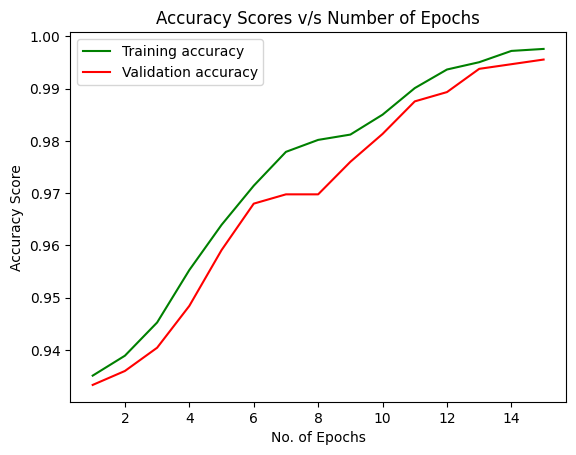

In [356]:
accuracy = history_log.history['accuracy']
val_accuracy = history_log.history['val_accuracy']
plt.plot(epochs, accuracy , 'g', label = 'Training accuracy')
plt.plot(epochs, val_accuracy , 'r', label = 'Validation accuracy')
plt.title('Accuracy Scores v/s Number of Epochs')
plt.xlabel('No. of Epochs')
plt.ylabel('Accuracy Score')
plt.legend()
plt.show()

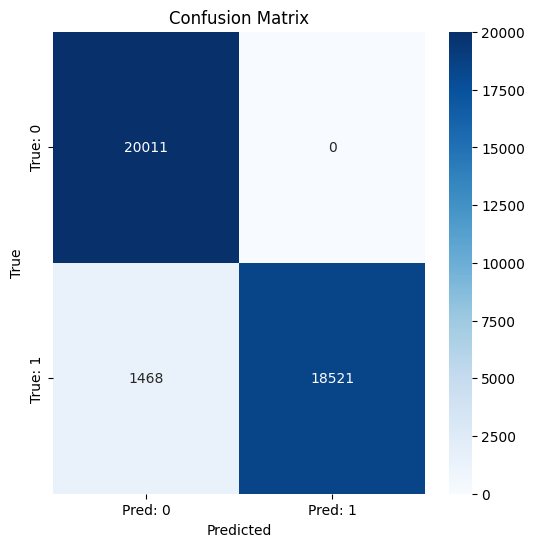

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Calculate confusion matrix
cm = confusion_matrix(y_test, predictions_binary)

# Plot confusion matrix
plt.figure(figsize=(6,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Pred: 0', 'Pred: 1'], yticklabels=['True: 0', 'True: 1'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


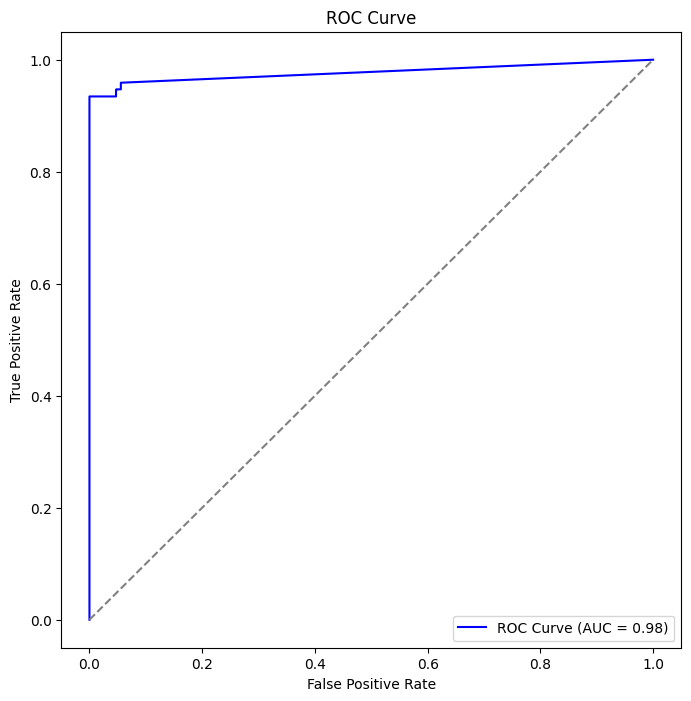

In [75]:
from sklearn.metrics import roc_curve, auc

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, predictions)

# Plot ROC curve
plt.figure(figsize=(8,8))
plt.plot(fpr, tpr, color='blue', label=f'ROC Curve (AUC = {auc(fpr, tpr):.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.show()


## Model evaluation for test set: